In [16]:
import pathlib
import textwrap
import io
import base64
from PIL import Image
import google.generativeai as genai

from IPython.display import display
from IPython.display import Markdown


def to_markdown(text):
  text = text.replace('•', '  *')
  return Markdown(textwrap.indent(text, '> ', predicate=lambda _: True))

In [17]:
# Used to securely store your API key
from configparser import ConfigParser

config = ConfigParser()
config.read('credentials.ini')
api_key = config['API_KEY']['google_api_key']

genai.configure(api_key=api_key)

In [18]:
for model in genai.list_models():
    print(model)

Model(name='models/chat-bison-001',
      base_model_id='',
      version='001',
      display_name='PaLM 2 Chat (Legacy)',
      description='A legacy text-only model optimized for chat conversations',
      input_token_limit=4096,
      output_token_limit=1024,
      supported_generation_methods=['generateMessage', 'countMessageTokens'],
      temperature=0.25,
      top_p=0.95,
      top_k=40)
Model(name='models/text-bison-001',
      base_model_id='',
      version='001',
      display_name='PaLM 2 (Legacy)',
      description='A legacy model that understands text and generates text as an output',
      input_token_limit=8196,
      output_token_limit=1024,
      supported_generation_methods=['generateText', 'countTextTokens', 'createTunedTextModel'],
      temperature=0.7,
      top_p=0.95,
      top_k=40)
Model(name='models/embedding-gecko-001',
      base_model_id='',
      version='001',
      display_name='Embedding Gecko',
      description='Obtain a distributed representatio

In [19]:
model_gemini_vision_pro = genai.GenerativeModel('gemini-1.5-pro')
model_gemini_pro = genai.GenerativeModel('gemini-pro')

In [20]:
def image_blob_creator(file_path, type):

    img = Image.open(file_path)
    image = img
    bytes_arr = io.BytesIO()
    img.save(bytes_arr, format=img.format)
    bytes_arr = bytes_arr.getvalue()

    encoded_image_data = base64.b64encode(bytes_arr)

    if type == 'jpg':
        type = 'jpeg'
        
    image_blob = {
        'mime_type' : f'image/{type}',
        'data': encoded_image_data.decode('utf-8')
    }

    return image_blob,image

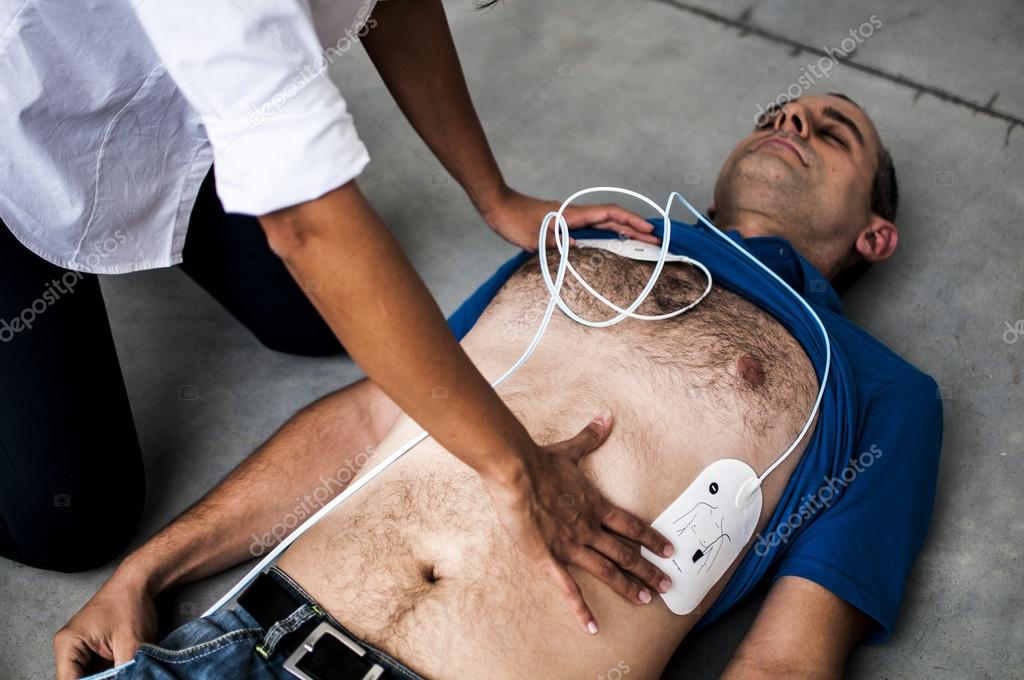

In [21]:
image_blob,img = image_blob_creator('/scratch/cjh9fw/Rivanna/2024/repos/web-bulk-image-downloader/dataset/bvm/BVM:3tipstoavoidover-ventilatingyourpatient.jpg','jpg') #bvm
image_blob,img = image_blob_creator('/scratch/cjh9fw/Rivanna/2024/repos/web-bulk-image-downloader/dataset/defib/Girlapplyingdefibrillatorpadstoanunconsciousguy—Stock....jpg','jpg') #bvm

display(img)


### General Tasks

In [22]:
prompt = """ Give me code to create a socketio server in python """
# response = model_gemini_pro.generate_content(
#     [prompt],
#     stream=True
# )

# for chunk in response:
#     print(chunk.text)

### Vision Related Tasks

In [24]:
prompt = """ Is this a picture of a kelly medical instrument?"""
# prompt = """ Mark the bag valve mask in the image and give it to me in a bounding box format """
prompt = """ Is the following action triplet correct? <bvm,ventilate,patient> where action triplet means <instrument,verb,target>"""
# prompt = """ Is the following action triplet correct? <defib_pads,attach,patient> where action triplet means <instrument,verb,target>"""
# prompt = """ Describe this image."""

prompt = """ Return bounding boxes as JSON arrays """


response = model_gemini_vision_pro.generate_content(
    [prompt,{'inline_data':image_blob}],
    stream=True
)

for chunk in response:
    print(chunk.text)


InternalServerError: 500 An internal error has occurred. Please retry or report in https://developers.generativeai.google/guide/troubleshooting

### Visualize bbox on image

In [15]:
# resize image to 1000x1000
img = img.resize((1000,1000))

bboxes = []
for chunk in response:
    bboxes.append(chunk.text)

print(bboxes)

AttributeError: 'NoneType' object has no attribute 'resize'

In [12]:
# draw bounding boxes on image using opencv

import cv2
import numpy as np

img = np.array(img)
for bbox in bboxes:
    x1,y1,x2,y2 = bbox
    cv2.rectangle(img, (x1,y1), (x2,y2), (255,0,0), 2)

img = Image.fromarray(img)
display(img)

ValueError: not enough values to unpack (expected 4, got 1)